In [1]:

# Import artificial dataset generator from sklearn
from sklearn.datasets import make_classification
# Import SVC
from sklearn.svm import SVC
# Import data splitting function
from sklearn.model_selection import train_test_split

from nice import NICE

import numpy as np


from counterplots import CreatePlot

df, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, n_classes=2, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

model = SVC(kernel='linear', random_state=1, probability=True)

model.fit(X_train, y_train)

NICE_gen = NICE(
    X_train = X_train,
    predict_fn=model.predict_proba,
    y_train = y_train,
    cat_feat=[],
    num_feat=[*range(X_test.shape[1])],
    )

fac = X_test[9]
cf = NICE_gen.explain(np.array([fac]))[0]

In [2]:
counterplot = CreatePlot(
    fac, 
    cf, 
    model.predict_proba)

In [3]:
counterplot.countershapley_values()

{'feature_names': ['f9', 'f2', 'f1'],
 'feature_values': (0.21725819478794295,
  0.18550820776081905,
  0.13944281048330487),
 'feature_indices': (8, 1, 0)}

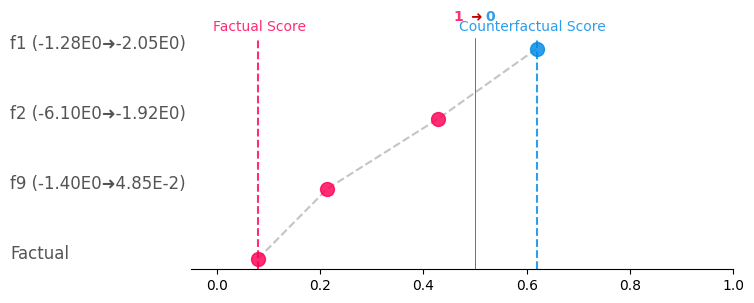

In [4]:
counterplot.greedy('greedy_example_1.pdf')

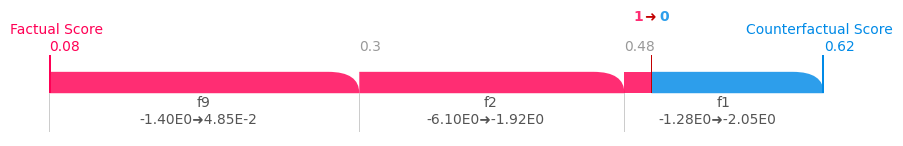

In [5]:
counterplot.countershapley('coutnershapley_example_1.pdf')

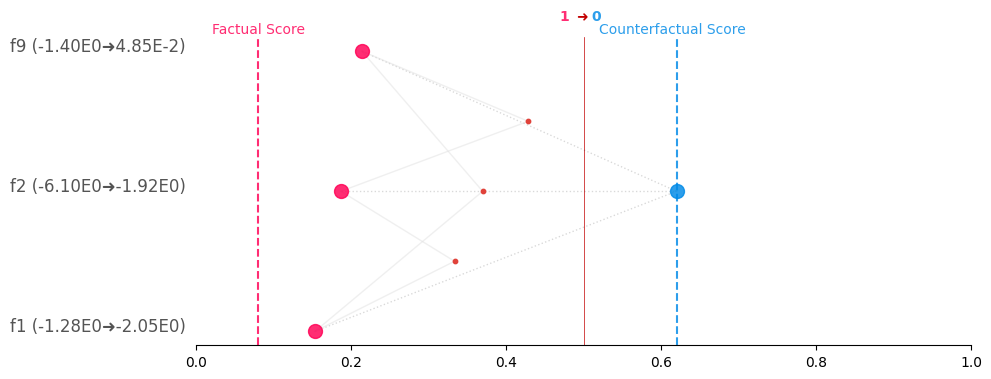

In [6]:
counterplot.constellation('constellation_example_1.pdf')